In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Churn_mini.csv') # main file with 10000 records ; no plots 
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(3701, 14)

In [4]:
#check if there are any null values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
# way to segregate numerical and categorical columns
df_num_col = df.select_dtypes(include = 'number')
df_cat_col = df.select_dtypes(include = 'object')


In [6]:
print(df_num_col.columns)
print(df_cat_col.columns)

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')
Index(['Surname', 'Geography', 'Gender'], dtype='object')


<AxesSubplot:xlabel='Exited', ylabel='count'>

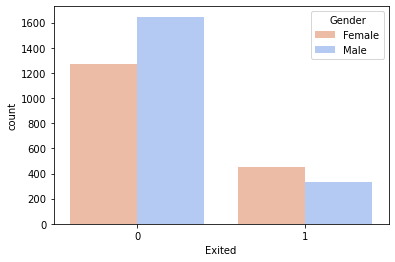

In [7]:
# Exit vs Gender - 
sns.countplot(x='Exited',data=df,hue='Gender',palette="coolwarm_r")

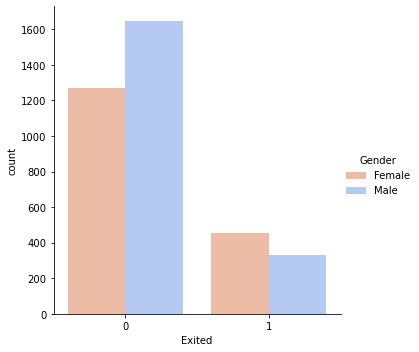

In [8]:
sns.catplot(x='Exited',data=df,hue='Gender',palette="coolwarm_r", kind = 'count')

In [9]:
#Calculate the exit percentage
print("Exit % in the org is::",(df['Exited'].value_counts()[1]/df['Exited'].count())*100) # ['yes']

Exit % in the org is:: 21.18346392866793


<Figure size 1152x432 with 0 Axes>

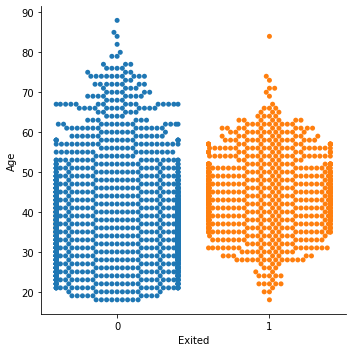

In [10]:
#Check to see if there is any relation b/w Age and Exit
plt.figure(figsize = (16,6))
sns.catplot(x = 'Exited',y = 'Age', data = df,hue = 'Exited', kind = 'swarm')
plt.show()

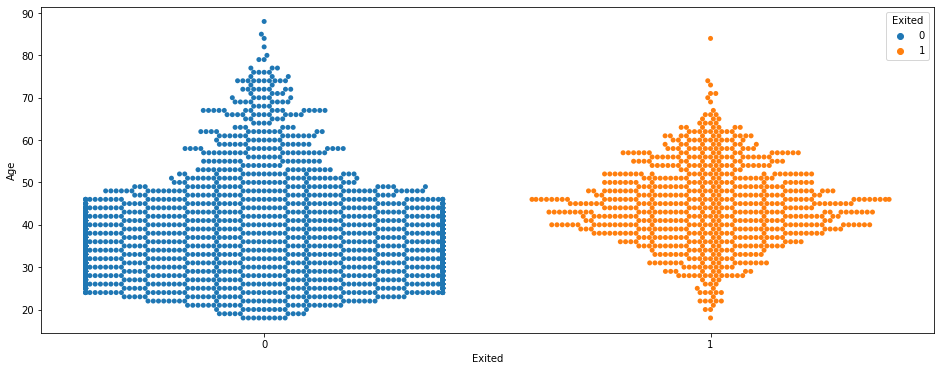

In [12]:
plt.figure(figsize = (16,6))
sns.swarmplot(x = 'Exited',y = 'Age', data = df,hue = 'Exited')
plt.show()

<Figure size 1152x432 with 0 Axes>

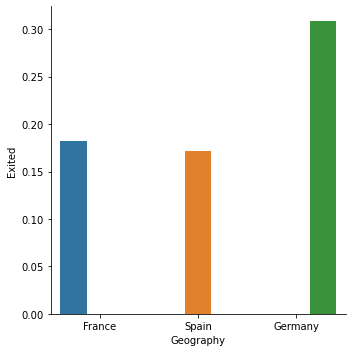

In [27]:
#Plotting Exit% for each country
plt.figure(figsize = (16,6))
sns.catplot(x= 'Geography', y = 'Exited' , data = df, hue = 'Geography', kind = 'bar',ci = None)
plt.show()

In [24]:
print(df['Exited'].value_counts()[1])

784


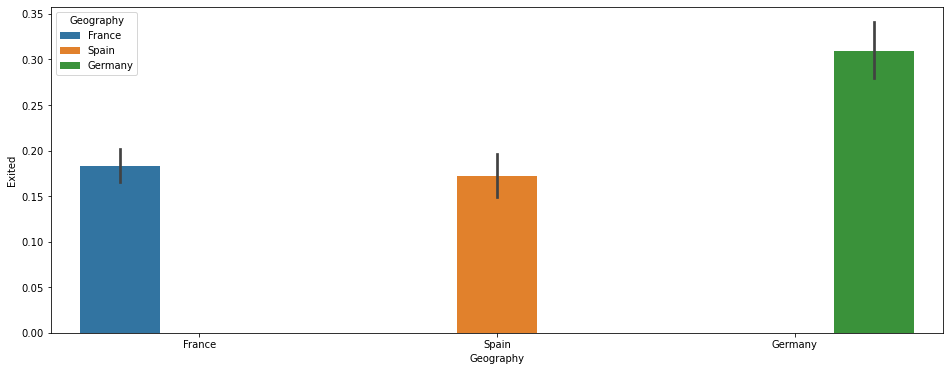

In [46]:
plt.figure(figsize = (16,6))
sns.barplot(x= 'Geography', y = 'Exited' , data = df, hue = 'Geography')
plt.show()

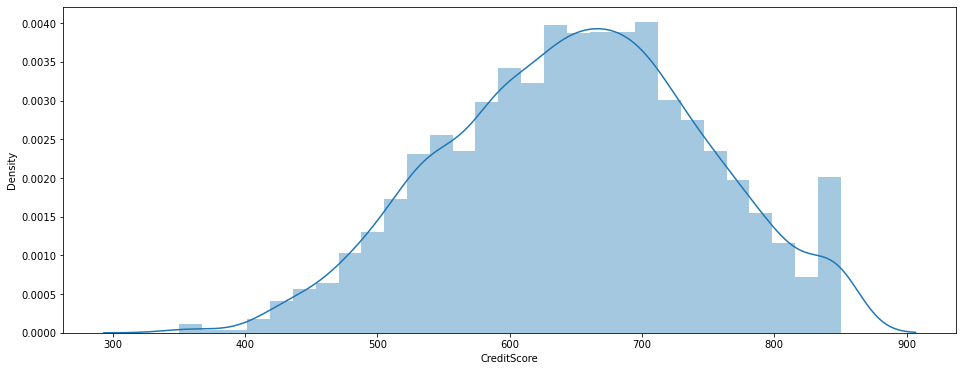

In [47]:
# CreditScore graph
plt.figure(figsize = (16,6))
sns.distplot(df['CreditScore'], kde = True)
plt.show()

### Data preprocessing

In [79]:
# Dropping and split the data into dependent and independent variable
x = df.iloc[:,3:-1] # dropped - ['RowNumber' , 'CustomerId' , 'Surname ']
y = df.iloc[:,-1]

In [80]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [96]:
df['Geography'].value_counts()

France     1861
Germany     933
Spain       907
Name: Geography, dtype: int64

In [81]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [82]:
print(x.shape,y.shape)

(3701, 10) (3701,)


In [83]:
# categorical columns - 
x_cat = x.select_dtypes(include = 'object')
print(x_cat.columns)

Index(['Geography', 'Gender'], dtype='object')


In [62]:
x[['Gender','Geography']]

,Gender,Geography
0,Female,France
1,Female,Spain
2,Female,France
3,Female,France
4,Female,Spain
...,...,...
3696,Female,France
3697,Male,Germany
3698,Female,France
3699,Male,France


In [63]:
# # one hot encoding - 
# x = pd.get_dummies(x, columns=['Geography','Gender'])
# x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3696,595,39,7,120962.13,1,0,0,23305.01,1,0,0,1,0
3697,745,48,10,96048.55,1,1,0,74510.65,0,1,0,0,1
3698,589,21,3,0.00,2,0,1,55601.44,1,0,0,1,0
3699,749,37,10,185063.70,2,1,1,134526.87,1,0,0,0,1


In [64]:
# x = x.drop(['Geography_France','Gender_Female'], axis=1 ) # as only 1 or only 0 can tell the other one

In [65]:
# x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [84]:
# label Encoder - 
from sklearn.preprocessing import LabelEncoder

In [85]:
le = LabelEncoder()

In [88]:
for col in x_cat:
    le = LabelEncoder()
    x[col]= le.fit_transform(x_cat[col])
    

In [89]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [99]:
## Data preprocessing - 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_stand = sc.fit_transform(x)
x_stand

array([[-0.31790362, -0.89912257, -1.07144654, ...,  0.6364647 ,
         0.97940681,  0.01486964],
       [-0.43062462,  1.52363144, -1.07144654, ..., -1.57117904,
         0.97940681,  0.2092445 ],
       [-1.51684516, -0.89912257, -1.07144654, ...,  0.6364647 ,
        -1.02102619,  0.23336384],
       ...,
       [-0.62532453, -0.89912257, -1.07144654, ..., -1.57117904,
         0.97940681, -0.77951935],
       [ 1.01425365, -0.89912257,  0.93331768, ...,  0.6364647 ,
         0.97940681,  0.59099433],
       [ 0.28669083, -0.89912257, -1.07144654, ...,  0.6364647 ,
         0.97940681,  1.64845279]])

In [100]:
# split the data into training and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_stand,y,test_size = 0.3, random_state = 101)

### Applying different ML algorithms-

In [101]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score

In [104]:
# logistic regression - 
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression().fit(x_train,y_train)

In [105]:
# predict with the train and test data
y_pred_logit_train = logit.predict(x_train)
y_pred_logit_test = logit.predict(x_test)

In [106]:
confusion_matrix(y_test, y_pred_logit_test)

array([[827,  23],
       [204,  57]], dtype=int64)

In [108]:
print(classification_report(y_test, y_pred_logit_test))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88       850
           1       0.71      0.22      0.33       261

    accuracy                           0.80      1111
   macro avg       0.76      0.60      0.61      1111
weighted avg       0.78      0.80      0.75      1111



In [109]:
print("Train Accuracy", accuracy_score(y_train, y_pred_logit_train))
print("*****************************************************")
print("Test Accuracy", accuracy_score(y_test, y_pred_logit_test))

Train Accuracy 0.815057915057915
*****************************************************
Test Accuracy 0.7956795679567957


In [110]:
logit_roc_auc = roc_auc_score(y_test,y_pred_logit_test)
logit_roc_auc

0.5956659905341447

In [113]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logit_test)

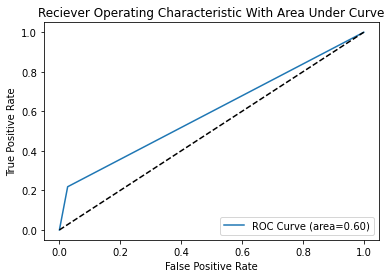

In [114]:
plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (area=%0.2f)" % logit_roc_auc)
plt.plot([0,1],[0,1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Reciever Operating Characteristic With Area Under Curve")
plt.legend(loc='lower right')
plt.show()

In [115]:
# DecisionTree
from sklearn.tree import DecisionTreeClassifier

In [117]:
dt = DecisionTreeClassifier().fit(x_train, y_train)

In [119]:
# predict with the train and test data
y_pred_dt_train = dt.predict(x_train)
y_pred_dt_test = dt.predict(x_test)

In [120]:
print("Train Accuracy", accuracy_score(y_train, y_pred_dt_train))
print("*****************************************************")
print("Test Accuracy", accuracy_score(y_test, y_pred_dt_test))

Train Accuracy 1.0
*****************************************************
Test Accuracy 0.7803780378037803


In [121]:
print(classification_report(y_test, y_pred_dt_test))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       850
           1       0.53      0.54      0.54       261

    accuracy                           0.78      1111
   macro avg       0.70      0.70      0.70      1111
weighted avg       0.78      0.78      0.78      1111



In [123]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt_test)
dt_roc_auc

0.6971737660581474

In [124]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt_test)

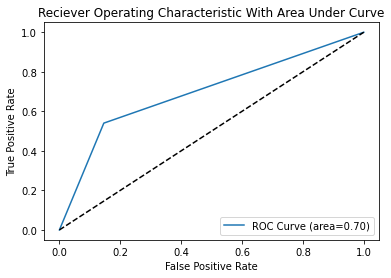

In [125]:
plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (area=%0.2f)" % dt_roc_auc)
plt.plot([0,1],[0,1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Reciever Operating Characteristic With Area Under Curve")
plt.legend(loc='lower right')
plt.show()

In [126]:
# Ensemble Learning
# bagging - 
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier( n_estimators=10, random_state=1) #base_estimator=dt
bg = bg.fit(x_train, y_train)

In [127]:
y_pred_bg_train =bg.predict(x_train)
y_pred_bg_test = bg.predict(x_test)

In [128]:
print("Train Accuracy", accuracy_score(y_train, y_pred_bg_train))
print("*****************************************************")
print("Test Accuracy", accuracy_score(y_test, y_pred_bg_test))

Train Accuracy 0.9822393822393822
*****************************************************
Test Accuracy 0.8343834383438344


In [129]:
print(classification_report(y_test, y_pred_bg_test))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       850
           1       0.72      0.48      0.58       261

    accuracy                           0.83      1111
   macro avg       0.79      0.71      0.74      1111
weighted avg       0.82      0.83      0.82      1111



In [130]:
bg_roc_auc = roc_auc_score(y_test, y_pred_bg_test)
bg_roc_auc

0.7125557809330629

In [131]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_bg_test)

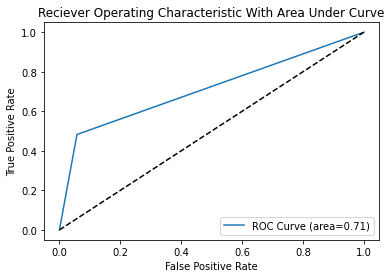

In [132]:
plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (area=%0.2f)" % bg_roc_auc)
plt.plot([0,1],[0,1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Reciever Operating Characteristic With Area Under Curve")
plt.legend(loc='lower right')
plt.show()

In [133]:
# RandomForest - 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(x_train, y_train)


In [134]:
y_pred_rf_train =rf.predict(x_train)
y_pred_rf_test = rf.predict(x_test)

In [135]:
print("Train Accuracy", accuracy_score(y_train, y_pred_rf_train))
print("*****************************************************")
print("Test Accuracy", accuracy_score(y_test, y_pred_rf_test))

Train Accuracy 1.0
*****************************************************
Test Accuracy 0.8307830783078308


In [136]:
print(classification_report(y_test, y_pred_rf_test))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       850
           1       0.73      0.44      0.55       261

    accuracy                           0.83      1111
   macro avg       0.79      0.70      0.72      1111
weighted avg       0.82      0.83      0.82      1111



In [137]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf_test)
rf_roc_auc

0.6969281045751634

In [138]:
# XG boost - 
from xgboost import XGBClassifier
xgb = XGBClassifier().fit(x_train, y_train)


In [139]:
y_pred_xgb_train = xgb.predict(x_train)
y_pred_xgb_test = xgb.predict(x_test)

In [140]:
print("Train Accuracy", accuracy_score(y_train, y_pred_xgb_train))
print("*****************************************************")
print("Test Accuracy", accuracy_score(y_test, y_pred_xgb_test))

Train Accuracy 0.9984555984555985
*****************************************************
Test Accuracy 0.828982898289829


In [141]:
print(classification_report(y_test, y_pred_xgb_test))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       850
           1       0.70      0.48      0.57       261

    accuracy                           0.83      1111
   macro avg       0.78      0.71      0.73      1111
weighted avg       0.82      0.83      0.82      1111



In [142]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgb_test)
xgb_roc_auc

0.709026369168357